In [1]:
import pandas as pd
import numpy as np

In [2]:
def getXDataMerged(myLocalPath='C:/Users/singh.lakhbir/Documents/simfin/'):
    incomeStatementData=pd.read_csv(myLocalPath+'us-income-annual.csv', delimiter=';')
    balanceSheetData=pd.read_csv(myLocalPath+'us-balance-annual.csv', delimiter=';')
    CashflowData=pd.read_csv(myLocalPath+'us-cashflow-annual.csv', delimiter=';')
    print('Income Statement CSV data is(rows, columns): ', incomeStatementData.shape)
    print('Balance Sheet CSV data is: ', balanceSheetData.shape)
    print('Cash Flow CSV data  is: ' , CashflowData.shape)

    # Merge the data together
    result = pd.merge(incomeStatementData, balanceSheetData,\
        on=['Ticker','SimFinId','Currency','Fiscal Year','Report Date','Publish Date'])
    result = pd.merge(result, CashflowData,\
        on=['Ticker','SimFinId','Currency','Fiscal Year','Report Date','Publish Date'])
        
    # dates in correct format
    result["Report Date"] = pd.to_datetime(result["Report Date"])
    result["Publish Date"] = pd.to_datetime(result["Publish Date"])
    print('Merged X data matrix shape is: ', result.shape)
    return result

X = getXDataMerged()

Income Statement CSV data is(rows, columns):  (11927, 28)
Balance Sheet CSV data is:  (11927, 30)
Cash Flow CSV data  is:  (11927, 28)
Merged X data matrix shape is:  (11927, 74)


In [3]:
X.keys()

Index(['Ticker', 'SimFinId', 'Currency', 'Fiscal Year', 'Fiscal Period_x',
       'Report Date', 'Publish Date', 'Restated Date_x', 'Shares (Basic)_x',
       'Shares (Diluted)_x', 'Revenue', 'Cost of Revenue', 'Gross Profit',
       'Operating Expenses', 'Selling, General & Administrative',
       'Research & Development', 'Depreciation & Amortization_x',
       'Operating Income (Loss)', 'Non-Operating Income (Loss)',
       'Interest Expense, Net', 'Pretax Income (Loss), Adj.',
       'Abnormal Gains (Losses)', 'Pretax Income (Loss)',
       'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses)', 'Net Income', 'Net Income (Common)',
       'Fiscal Period_y', 'Restated Date_y', 'Shares (Basic)_y',
       'Shares (Diluted)_y', 'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Inventories', 'Total Current Assets',
       'Property, Plant & Equipment, Net',
       'Long Ter

In [4]:
len(X.keys())

74

In [5]:
def getYRawData(my_local_path='C:/Users/singh.lakhbir/Documents/simfin/'):
    dailySharePrices = pd.read_csv(my_local_path + 'us-shareprices-daily.csv', delimiter=';')
    dailySharePrices["Date"] = pd.to_datetime(dailySharePrices["Date"])
    print('Stock Price data matrix is: ',dailySharePrices.shape)
    return dailySharePrices

In [6]:
d = getYRawData()
d[d['Ticker']=='GOOG']

Stock Price data matrix is:  (3229385, 11)


,Ticker,SimFinId,Date,Open,Low,High,Close,Adj. Close,Dividend,Volume,Shares Outstanding
0,GOOG,18,2017-03-21,42.57,41.45,42.67,41.52,41.52,NaN,49269680,1.382586e+10
1,GOOG,18,2017-03-22,41.60,41.36,41.78,41.48,41.48,NaN,28029300,1.382586e+10
2,GOOG,18,2017-03-23,41.05,40.61,41.13,40.88,40.88,NaN,69741120,1.382586e+10
3,GOOG,18,2017-03-24,41.00,40.44,41.10,40.72,40.72,NaN,39620120,1.382586e+10
4,GOOG,18,2017-03-27,40.35,40.17,41.08,40.98,40.98,NaN,37899800,1.382586e+10
...,...,...,...,...,...,...,...,...,...,...,...
1255,GOOG,18,2022-03-15,127.74,126.57,130.52,129.66,129.66,NaN,30292600,1.331516e+10
1256,GOOG,18,2022-03-16,131.00,129.20,133.77,133.69,133.69,NaN,32058200,1.331516e+10
1257,GOOG,18,2022-03-17,133.32,132.72,134.74,134.60,134.60,NaN,23994380,1.331516e+10
1258,GOOG,18,2022-03-18,133.88,132.93,136.91,136.80,136.80,NaN,45490440,1.331516e+10


In [7]:
def getYPriceDataNearDate(ticker, date, modifier, dailySharePrices):
    windowDays=5
    rows = dailySharePrices[(dailySharePrices["Date"].between(pd.to_datetime(date) + pd.Timedelta(days=modifier), pd.to_datetime(date) + pd.Timedelta(days=windowDays+modifier))) & (dailySharePrices["Ticker"]==ticker)]
    if rows.empty:
        return [ticker, np.float("NaN"),\
            np.datetime64('NaT'),\
            np.float("NaN")]
    else:
        return [ticker, rows.iloc[0]["Open"],\
            rows.iloc[0]["Date"],\
            rows.iloc[0]["Volume"]*rows.iloc[0]["Open"]]
'''
Return just the y price and volume.
Take the first day price/volume of the list of days,
that fall in the window of accepted days.
'modifier' just modifies the date to look between.
Returns a list.
'''

"\nReturn just the y price and volume.\nTake the first day price/volume of the list of days,\nthat fall in the window of accepted days.\n'modifier' just modifies the date to look between.\nReturns a list.\n"

In [8]:
getYPriceDataNearDate('AAPL', '2018-02-02',0, d)

['AAPL', 41.5, Timestamp('2018-02-02 00:00:00'), 14182388450.0]

In [9]:
getYPriceDataNearDate('AAPL', '2018-02-02',30, d)

['AAPL', 43.8, Timestamp('2018-03-05 00:00:00'), 4975919323.2]

In [10]:
'''
Takes in all fundamental data X, all stock prices over time y,
and modifier (days), and returns the stock price info for the
data report date, as well as the stock price one year from that date
(if modifier is left as modifier=365)
'''

def getYPricesReportDateAndTargetDate(x, d, modifier=365):
    # Preallocation list of list of 2
    # [(price at date) (price at date + modifier)]
    y = [[None]*8 for i in range(len(x))]

    whichDateCol='Publish Date'# or 'Report Date',
    # is the performance date from->to. Want this to be publish date.
    # Because of time lag between report date
    # (which can't be actioned on) and publish date
    # (data we can trade with)

    i=0
    for index in range(len(x)):
        y[i]=(getYPriceDataNearDate(x['Ticker'].iloc[index],
                                    x[whichDateCol].iloc[index],0,d)
                                    +getYPriceDataNearDate(x['Ticker'].iloc[index],
                                                           x[whichDateCol].iloc[index],
                                                           modifier, d))
        i=i+1
    return y

In [11]:
X = getXDataMerged()
X.to_csv("Annual_Stock_Price_Fundamentals.csv")

Income Statement CSV data is(rows, columns):  (11927, 28)
Balance Sheet CSV data is:  (11927, 30)
Cash Flow CSV data  is:  (11927, 28)
Merged X data matrix shape is:  (11927, 74)


In [12]:
# We want to know the performance for each stock,
# each year, between 10-K report dates.
#takes VERY long time, several hours.
#because of lookups in this function:
y = getYPricesReportDateAndTargetDate(X, d, 365)

C:\Users\singh.lakhbir\AppData\Local\Temp\ipykernel_14324\1438240523.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return [ticker, np.float("NaN"),\
C:\Users\singh.lakhbir\AppData\Local\Temp\ipykernel_14324\1438240523.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.float("NaN")]


In [13]:
y

[['A',
  67.51,
  Timestamp('2017-12-21 00:00:00'),
  100936631.36000001,
  'A',
  65.22,
  Timestamp('2018-12-21 00:00:00'),
  305431782.0],
 ['A',
  66.33,
  Timestamp('2018-12-20 00:00:00'),
  235326502.62,
  'A',
  84.94,
  Timestamp('2019-12-20 00:00:00'),
  194325137.42],
 ['A',
  83.95,
  Timestamp('2019-12-19 00:00:00'),
  142379703.70000002,
  'A',
  119.23,
  Timestamp('2020-12-18 00:00:00'),
  466401648.63],
 ['A',
  119.23,
  Timestamp('2020-12-18 00:00:00'),
  466401648.63,
  'A',
  150.76,
  Timestamp('2021-12-20 00:00:00'),
  305621727.32],
 ['A',
  150.35,
  Timestamp('2021-12-17 00:00:00'),
  395223541.5,
  'A',
  nan,
  numpy.datetime64('NaT'),
  nan],
 ['A18',
  nan,
  numpy.datetime64('NaT'),
  nan,
  'A18',
  nan,
  numpy.datetime64('NaT'),
  nan],
 ['A18',
  nan,
  numpy.datetime64('NaT'),
  nan,
  'A18',
  nan,
  numpy.datetime64('NaT'),
  nan],
 ['A18',
  nan,
  numpy.datetime64('NaT'),
  nan,
  'A18',
  nan,
  numpy.datetime64('NaT'),
  nan],
 ['A18',
  nan,
  

In [14]:
y = pd.DataFrame(y, columns=['Ticker', 'Open Price', 'Date', 'Volume',\
                             'Ticker2', 'Open Price2', 'Date2', 'Volume2'])
y.to_csv("Annual_Stock_Price_Performance.csv")

In [20]:
y

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
0,A,67.51,2017-12-21,1.009366e+08,A,65.22,2018-12-21,3.054318e+08
1,A,66.33,2018-12-20,2.353265e+08,A,84.94,2019-12-20,1.943251e+08
2,A,83.95,2019-12-19,1.423797e+08,A,119.23,2020-12-18,4.664016e+08
3,A,119.23,2020-12-18,4.664016e+08,A,150.76,2021-12-20,3.056217e+08
4,A,150.35,2021-12-17,3.952235e+08,A,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
11922,ZYXI,4.55,2018-02-28,5.852392e+05,ZYXI,4.51,2019-02-28,2.961627e+05
11923,ZYXI,5.09,2019-02-26,2.683601e+05,ZYXI,11.90,2020-02-26,3.442361e+06
11924,ZYXI,11.25,2020-02-27,4.283404e+06,ZYXI,14.55,2021-02-26,3.741924e+07
11925,ZYXI,16.78,2021-02-25,7.177796e+06,ZYXI,6.37,2022-02-25,3.256204e+06


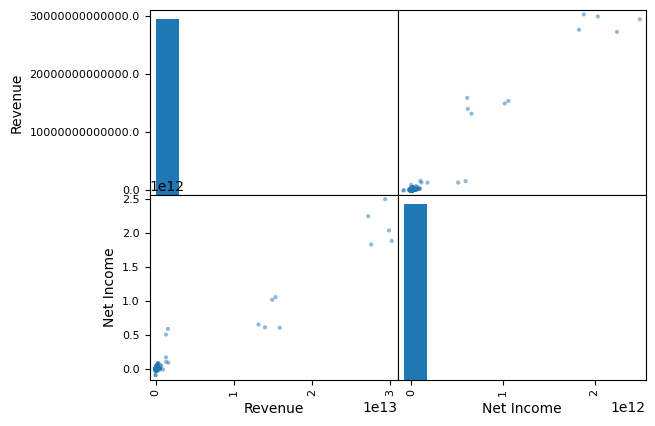

In [15]:
from pandas.plotting import scatter_matrix
attributes=["Revenue","Net Income"]
scatter_matrix(X[attributes]);

In [17]:
y[(y['Volume']<1e4) | (y['Volume2']<1e4)]

,Ticker,Open Price,Date,Volume,Ticker2,Open Price2,Date2,Volume2
28,AAMC,24.67,2021-03-03,1978040.60,AAMC,17.90,2022-03-03,0.00
103,ABMC,0.09,2018-04-12,0.00,ABMC,0.07,2019-04-12,0.00
104,ABMC,0.07,2019-04-16,0.28,ABMC,0.21,2020-04-15,237501.60
105,ABMC,0.72,2020-07-24,291122.64,ABMC,0.05,2021-07-26,4023.00
156,ACAN,0.64,2021-12-06,4406.40,ACAN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
11808,YGYI,0.28,2021-06-25,5021.24,YGYI,NaN,NaT,NaN
11815,YOGAQ,1.02,2019-03-27,116936.88,YOGAQ,0.13,2020-03-26,2455.70
11849,ZDGE,2.46,2017-10-30,64385.58,ZDGE,1.86,2018-10-30,4268.70
11850,ZDGE,1.72,2018-10-29,1735.48,ZDGE,1.69,2019-10-29,1855.62


In [18]:
# Issue where no share price
bool_list1 = ~y["Open Price"].isnull()
# Issue where there is low/no volume
bool_list2 = ~((y['Volume']<1e4) | (y['Volume2']<1e4))
# Issue where dates missing(Removes latest data too, which we can't use)
bool_list3 = ~y["Date2"].isnull()
y=y[bool_list1 & bool_list2 & bool_list3]
X=X[bool_list1 & bool_list2 & bool_list3]

# Issues where no listed number of shares
bool_list4 = ~X["Shares (Diluted)_x"].isnull()
y=y[bool_list4]
X=X[bool_list4]
y=y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [19]:
X.shape

(8210, 74)

In [20]:
y.shape

(8210, 8)

In [21]:
X.to_csv("Annual_Stock_Price_Fundamentals_Filtered.csv")
y.to_csv("Annual_Stock_Price_Performance_Filtered.csv")